In [0]:
import tensorflow as tf
import numpy as np
import os

In [0]:
# Reading the directory - Train and Validation Set

train_pneumonia_data = os.path.join('/content/chest_xray/train/PNEUMONIA')
train_normal_data = os.path.join('/content/chest_xray/train/NORMAL')

test_pneumonia_data = os.path.join('/content/chest_xray/test/PNEUMONIA')
test_normal_data = os.path.join('/content/chest_xray/test/NORMAL')

In [0]:
# Lets look at the images in train dataset

train_pneumonia_names = os.listdir(train_pneumonia_data)

print(train_pneumonia_names[:10])

train_normal_names = os.listdir(train_normal_data)

print(train_normal_names[:10])

['person585_bacteria_2416.jpeg', 'person1638_bacteria_4341.jpeg', 'person1101_bacteria_3042.jpeg', 'person565_bacteria_2348.jpeg', 'person688_bacteria_2584.jpeg', 'person938_bacteria_2863.jpeg', 'person143_virus_289.jpeg', 'person498_bacteria_2101.jpeg', 'person1446_bacteria_3739.jpeg', 'person1168_virus_1966.jpeg']
['NORMAL2-IM-0868-0001.jpeg', 'NORMAL2-IM-0897-0001.jpeg', 'IM-0629-0001-0002.jpeg', 'IM-0410-0001.jpeg', 'NORMAL2-IM-1290-0001.jpeg', 'NORMAL2-IM-0450-0001.jpeg', 'NORMAL2-IM-0653-0001.jpeg', 'NORMAL2-IM-0525-0001.jpeg', 'IM-0306-0001.jpeg', 'NORMAL2-IM-1155-0001.jpeg']


In [0]:
print('Total training Pneumonia detected images:', len(os.listdir(train_pneumonia_data)))
print('Total training Normal detected images:', len(os.listdir(train_normal_data)))

Total training Pneumonia detected images: 3875
Total training Normal detected images: 1341


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/chest_xray/train/' 
VAL_DIR = '/content/chest_xray/val/'
TEST_DIR = '/content/chest_xray/test/'
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(299,299),
    batch_size = 256,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (299,299),
    batch_size = 256,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
# Model Building:

inputs = tf.keras.layers.Input(shape = (299,299,3))

#CONVO-1

conv1 = tf.keras.layers.Conv2D(filters= 128, kernel_size=(3,3), strides= (2,2), padding= 'same', activation='relu')(inputs)
maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides= 2 , padding='same')(conv1)
dropout1 = tf.keras.layers.Dropout(0.2)(maxpool1)

# CONVO-2

conv2 = tf.keras.layers.Conv2D(filters= 246, kernel_size=(3,3), strides= (2,2), padding= 'same', activation='relu')(dropout1)
maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(4,4),strides= 2 , padding='same')(conv2)
dropout2 = tf.keras.layers.Dropout(0.2)(maxpool2)


#FLATTEN

flatten = tf.keras.layers.Flatten()(dropout2)
dense1 = tf.keras.layers.Dense(1024, activation= 'relu')(flatten)
dropout3 = tf.keras.layers.Dropout(0.2)(dense1)
output = tf.keras.layers.Dense(1 , activation= 'sigmoid')(dropout3)

In [0]:
model = tf.keras.Model(inputs=inputs, outputs=output)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 246)       283638    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 246)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 19, 246)       0   

In [0]:
from tensorflow.keras.optimizers import Adagrad

model.compile(loss= 'binary_crossentropy' , optimizer= Adagrad(learning_rate=0.01) , metrics= ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  
      epochs=10,
      verbose=1,
      validation_data = test_generator,
      validation_steps=5)

Epoch 1/10
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
10/10 [==============================] - 101s 10s/step - loss: 0.6114 - acc: 0.7055 - val_loss: 0.6709 - val_acc: 0.6250
Epoch 2/10
10/10 [==============================] - 77s 8s/step - loss: 0.5761 - acc: 0.7387 - val_loss: 0.6684 - val_acc: 0.6338
Epoch 3/10
10/10 [==============================] - 86s 9s/step - loss: 0.5451 - acc: 0.7488 - val_loss: 0.6842 - val_acc: 0.6232
Epoch 4/10
10/10 [==============================] - 80s 8s/step - loss: 0.5555 - acc: 0.7454 - val_loss: 0.6665 - val_acc: 0.6276
Epoch 5/10
10/10 [==============================] - 85s 9s/step - loss: 0.5530 - acc: 0.7395 - val_loss: 0.6741 - val_acc: 0.6285
Epoch 6/10
10/10 [==============================] - 79s 8s/step - loss: 0.5474 - acc: 0.7450 - val_loss: 0.6792 - val_acc: 0.6162
Epoch 7/10
10/10 [==============================] - 81s 8s/step - loss: 0.5369 - acc: 0.7531 - val_l

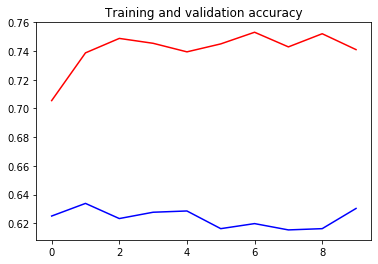

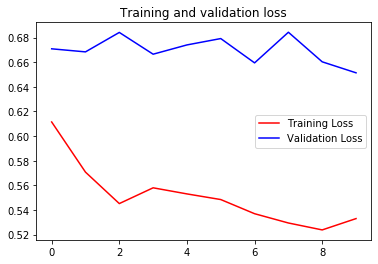

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()